# Falso Color (Simple)

In [1]:
#@markdown # Seleccionar Imagen
path_raw_img = "./Files_decoded/img_rx_raw.png" # @param {type:"string"}
# Ruta de salida para la imagen png con falso color
out_path="./Files_Color/img_color1" # @param {type:"string"}

In [2]:
#@markdown Librerías
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
def save_image(arr: np.ndarray, out_path: str) -> None:
    """
    Guardar matriz numpy como archivo de imagen

    :param arr: 2D image array to write to image
    :param out_path: path to save image
    """

    image = Image.fromarray(arr.astype(np.uint8))
    create_directory_if_not_exists(out_path)
    image.save(out_path)

def apply_colormap(
    arr: np.ndarray,
    cm: matplotlib.colors.LinearSegmentedColormap = plt.get_cmap("gist_earth"),
) -> np.ndarray:
    """
    Falsa Color basado en la intensidad de la escala de grises

    :param arr: Matriz 2D de imagen
    :param cm: mapa entre escala de grises y coloreado
    :return: matriz coloreada
    """

    # Obtener el mapa de colores por nombre:
    colorized = cm(arr)

    return colorized[:, :, :3] * 255


import os
import requests

def create_directory_if_not_exists(path:str):
    """
    Verificar y crear el directorio de salida si no existe
    :param path: Ruta del directorio a comprobar si existe.
    """
    try:
        directorio_salida = os.path.dirname(path)
        if not os.path.exists(directorio_salida):
            os.makedirs(directorio_salida)
            print(f"Se creó el directorio: {directorio_salida}")
    except OSError as e:
        print(f"Error al crear el directorio: {e}")
 

In [4]:
path_raw_img

'./Files_decoded/img_rx_raw.png'

In [5]:
imagen_raw = Image.open(path_raw_img)
imagen_raw_pixels = np.asarray(imagen_raw)

In [6]:
#@markdown Seleccionar mapa de color para el Falso Color

#@markdown Mapas de colores permitidos
# ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
# 'gnuplot', 'gnuplot2', 'CMRmap','cubehelix', 'brg', 'gist_rainbow',
# 'rainbow', 'jet','turbo', 'nipy_spectral', 'gist_ncar']

colormap_overlay = "cubehelix" # @param ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap','cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet','turbo', 'nipy_spectral', 'gist_ncar'] {allow-input: false}


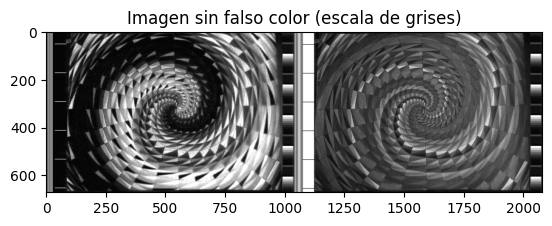

In [7]:
amax = np.max(np.abs(imagen_raw_pixels))
plt.imshow(imagen_raw_pixels/amax, cmap="gray")
plt.title(f"Imagen sin falso color (escala de grises)")
plt.show()

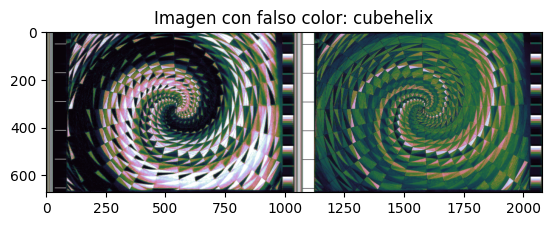

In [8]:
# colorear la imagen en escala de grises 
image_colorized = apply_colormap(imagen_raw_pixels,plt.get_cmap(colormap_overlay))
a = np.max(np.abs(image_colorized))

plt.imshow(image_colorized/a)
plt.title(f"Imagen con falso color: {colormap_overlay}")
plt.show()

In [9]:
# Guardar numpy array como archivo de imagen
save_image(image_colorized, out_path=f"{out_path}_raw_colorized.png")